# Agenda
- text data analysing 
- data prediction
- model evaluation

# NLP problems types:
    sentiment analysis/context analysis
    topic modelling
    classification
    chatbot
    knowledge graph

# common issues with text data
        tranform text data to lower case
        removing stop words
        Lammetization/stemming
        removing punctuations
        tokenisation
        NER indentification
        abbreviation correction
        removing numbers

# packages available for relevant problems
    language model
    lstm

In [1]:
from nltk.tokenize import LineTokenizer,line_tokenize,blankline_tokenize,WhitespaceTokenizer
import string
import nltk
import re
stopword = nltk.corpus.stopwords.words("english")

import pandas as pd
pd.set_option("Display.max_rows",1000)
pd.set_option("Display.max_columns",1000)
pd.set_option("Display.width",500)

In [3]:
#import text data
df =pd.read_csv("Data_class.csv")
#dimention of dataset
df.shape

(23516, 4)

In [4]:
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [5]:
#text
df["Tweet"][0]

'Intravenous azithromycin-induced ototoxicity.'

In [6]:
df["Tweet"][1]

"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation."

In [7]:
##

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punctuation(text):
    """This function removes punctuation marks form the given text."""
    holder = []
    for word in text:
        if word not in string.punctuation:
            holder.append(word.lower())
    return "".join(holder) # return sentence by combining words 

In [ ]:
# df["Tweet"].iloc[1:6]

In [9]:
df['Tweet_wo_punc'] = df['Tweet'].apply(remove_punctuation)
# df['Tweet_wo_punc']

In [10]:
df.head()

,UserId,TweetId,Tweet,ADR_label,Tweet_wo_punc
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycininduced ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization while pagets bone disease was p...
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia in a patien...
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...


In [11]:
##
def remove_numbers(text):
    tweet = re.sub("[0-9]+",'', text) # replace digits with blank 
    return tweet   

In [12]:
df['Tweet_wo_num'] = df['Tweet_wo_punc'].apply(remove_numbers)
df.head()

,UserId,TweetId,Tweet,ADR_label,Tweet_wo_punc,Tweet_wo_num
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...


In [13]:
## 
def port_stemming(text):
    tweet = [nltk.PorterStemmer().stem(word) for word in text]
    return "".join(tweet)

df['Tweet_wo_pstem'] = df['Tweet_wo_num'].apply(port_stemming )

In [14]:
df.iloc[:,-3:].head()

,Tweet_wo_punc,Tweet_wo_num,Tweet_wo_pstem
0,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity
1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...
2,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...
3,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
4,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...


In [16]:
#  
from nltk.stem.snowball import SnowballStemmer
def snowball_stemming(text):
    tweet = [SnowballStemmer('english').stem(word) for word in text]
    return "".join(tweet)

df['Tweet_wo_sstem'] = df['Tweet_wo_num'].apply(snowball_stemming )

In [17]:
# ['methods','years','yr','one','two']

In [18]:
df.head(10)

,UserId,TweetId,Tweet,ADR_label,Tweet_wo_punc,Tweet_wo_num,Tweet_wo_pstem,Tweet_wo_sstem
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
5,10082597,599105,"Naproxen, the most common offender, has been a...",1,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...


In [19]:
df.iloc[:,-4:].head(20)

,Tweet_wo_punc,Tweet_wo_num,Tweet_wo_pstem,Tweet_wo_sstem
0,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity
1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...
2,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...
3,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
4,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...
5,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...
6,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
7,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
8,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...
9,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...


In [20]:
def tokenization(text):
    return re.split("\W+",text)
df['Tweet_tokens'] = df['Tweet_wo_sstem'].apply(tokenization )

In [21]:
df.head()

,UserId,TweetId,Tweet,ADR_label,Tweet_wo_punc,Tweet_wo_num,Tweet_wo_pstem,Tweet_wo_sstem,Tweet_tokens
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,"[intravenous, azithromycininduced, ototoxicity]"
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,"[immobilization, while, pagets, bone, disease,..."
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,"[unaccountable, severe, hypercalcemia, in, a, ..."
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,"[methods, we, report, two, cases, of, pseudopo..."
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,"[methods, we, report, two, cases, of, pseudopo..."


In [22]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def remove_stopwords(text):
    tweet = [word for word in text if word not in stopword]
    return tweet
    
df['Tweets_wo_stopwords'] = df['Tweet_tokens'].apply(remove_stopwords)
# df['Tweet_tokens'].apply(remove_stopwords)

In [24]:
df.head(20)

,UserId,TweetId,Tweet,ADR_label,Tweet_wo_punc,Tweet_wo_num,Tweet_wo_pstem,Tweet_wo_sstem,Tweet_tokens,Tweets_wo_stopwords
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity,"[intravenous, azithromycininduced, ototoxicity]","[intravenous, azithromycininduced, ototoxicity]"
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,immobilization while pagets bone disease was p...,"[immobilization, while, pagets, bone, disease,...","[immobilization, pagets, bone, disease, presen..."
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...,"[unaccountable, severe, hypercalcemia, in, a, ...","[unaccountable, severe, hypercalcemia, patient..."
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,"[methods, we, report, two, cases, of, pseudopo...","[methods, report, two, cases, pseudoporphyria,..."
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,methods we report two cases of pseudoporphyria...,"[methods, we, report, two, cases, of, pseudopo...","[methods, report, two, cases, pseudoporphyria,..."
5,10082597,599105,"Naproxen, the most common offender, has been a...",1,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,naproxen the most common offender has been ass...,"[naproxen, the, most, common, offender, has, b...","[naproxen, common, offender, associated, dimor..."
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,"[results, a, yearold, man, taking, naproxen, f...","[results, yearold, man, taking, naproxen, chro..."
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,"[results, a, yearold, man, taking, naproxen, f...","[results, yearold, man, taking, naproxen, chro..."
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,"[results, a, yearold, man, taking, naproxen, f...","[results, yearold, man, taking, naproxen, chro..."
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for...,1,results a 44yearold man taking naproxen for ch...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,results a yearold man taking naproxen for chro...,"[results, a, yearold, man, taking, naproxen, f...","[results, yearold, man, taking, naproxen, chro..."


In [25]:
df['Tweets_wo_stopwords'].head(40)

0       [intravenous, azithromycininduced, ototoxicity]
1     [immobilization, pagets, bone, disease, presen...
2     [unaccountable, severe, hypercalcemia, patient...
3     [methods, report, two, cases, pseudoporphyria,...
4     [methods, report, two, cases, pseudoporphyria,...
5     [naproxen, common, offender, associated, dimor...
6     [results, yearold, man, taking, naproxen, chro...
7     [results, yearold, man, taking, naproxen, chro...
8     [results, yearold, man, taking, naproxen, chro...
9     [results, yearold, man, taking, naproxen, chro...
10    [background, best, treat, psychotic, patients,...
11    [conclusion, results, suggest, olanzapine, may...
12    [prolonged, severe, fluorouracilassociated, ne...
13    [describe, side, effects, fu, colon, cancer, p...
14    [describe, side, effects, fu, colon, cancer, p...
15    [describe, side, effects, fu, colon, cancer, p...
16    [case, suggests, bhac, derivative, cytosine, a...
17    [report, case, reversible, encephalopathy,

In [26]:
# ['yearold','man','female','old','one','two','methods']

In [27]:
# ngrams
# bigram ()

In [28]:
# #  - a b c
# #     - a b d
# #     - r f a
# #   a b c d f r 
# #   1 1 1 0 0 0
# #   1 1 0 1 0 0
# #   1 0 0 0 1 1 

# bigram 
#  ab bc cd df rf
    
# trigram    
    
    

In [29]:
# not good 
# bad 

# bank of america

# This is bank of america located in USA.

In [30]:
## 
# Hypothesis: both the classes have different tweets length
df['Tweet_length'] = df['Tweet'].apply(lambda x: len(x)- len(''))
df['Tweet_length']

0         45
1        190
2        103
3         81
4         81
5        192
6        221
7        221
8        221
9        221
10       139
11       182
12       118
13       222
14       222
15       222
16       159
17       250
18       250
19        87
20       159
21        96
22       288
23       117
24       117
25       231
26       231
27        88
28       172
29       164
30       219
31       102
32        95
33        90
34       104
35        57
36       145
37       145
38       245
39        75
40        51
41       190
42       129
43       129
44       129
45       112
46        50
47       116
48       268
49       268
50       268
51       268
52       111
53       138
54       182
55       146
56        77
57       113
58        32
59       148
60        93
61       111
62        46
63       154
64       154
65       127
66       127
67       170
68       108
69       124
70        62
71        99
72       188
73       144
74       144
75       144
76       144

In [31]:
neg_tweets_len = df[df.ADR_label==1]['Tweet_length']
pos_tweets_len = df[df.ADR_label==0]['Tweet_length']

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

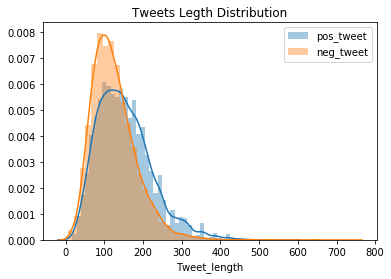

In [33]:
sns.distplot(neg_tweets_len)
sns.distplot(pos_tweets_len)
plt.title('Tweets Legth Distribution')
plt.legend(['pos_tweet','neg_tweet'])

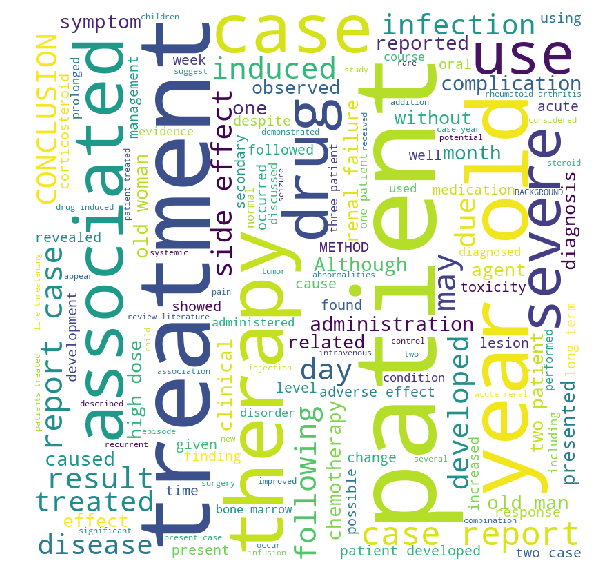

In [36]:
list_ = []
for i in range(0,len(df)):
    list_.append(df['Tweet'][i])
list_
reviews = "".join(list_)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
#                 stopwords = stopwords, 
                min_font_size = 10).generate(reviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)


In [37]:
# ##
# remove irrelevant words
# build model 